## learning-AI101 : topic3_3

In [24]:
# 여태까지 했던거 : 의류 이미지 구분하기 프로젝트
# 모델 만들기 -> compile -> fit 

import tensorflow as tf
import matplotlib.pyplot as plt
import requests
import numpy as np
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

df = tf.keras.datasets.fashion_mnist.load_data()

(train_X, train_y), (test_X, test_y) = df
train_X = train_X.reshape( (60000, 28, 28, 1) )
test_X  = test_X.reshape( (10000, 28, 28, 1) )

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anke boot']

-------

### 1. 입력 layer에 convolution layer 추가하기

* **Conv2D()** : convolutional layer
* 이미지의 초점이 벗어나지 않기 위해서 (특정 사물의 위치가 변했다고 인식을 못하게하지 않기 위해서 / 전 노트북의 자동차 사진같이) **max pooling layer**을 Conv2d() layer 다음으로 집어넣는다 (파라미터 : pooling size)  
  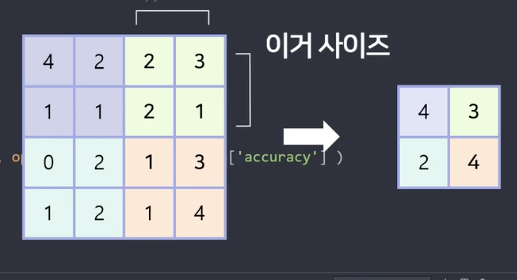
* 파라미터 : 32, (3, 3) -> 32개의 feature extraction, kernel 가로 세로 사이즈  
* padding : padding layer    
* 입력창이니깐 input_shape를 이용한다 (반드시 train_X과 같은 모양새)

**Convolutional layer 모델링 순서 결론**  
(Conv 레이어, Pooling 레이어) 여러번, Flatten, Dense 여러번, 출력

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D( (2, 2) ),
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D( (2, 2) ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"), 
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit (train_X, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4887 - accuracy: 0.8451
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2906 - accuracy: 0.8938
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2573 - accuracy: 0.9061
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2332 - accuracy: 0.9141
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2140 - accuracy: 0.9200


In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1568)              0         
                                                                 
 dense_17 (Dense)            (None, 64)               

-------

학습 후 **모델을 평가**할 수도 있다. (model.evaluate(test_X, test_y))  
모델을 평가할 땐 컴퓨터가 처음 보는 데이터인 test 데이터를 삽입한다  
평가로 나온 리턴값 중 score[0]은 loss, score[1]은 accuracy  
보통은 마지막 epoch에서 나온 accuracy와 평가의 accuracy는 다르다 (overfitting 현상)  
overfitting 현상 == 수능수학기출 100번 풀었는데 실모에서 잘 못푸는거 (새로운걸 보면 잘 못푸는거)

In [28]:
score = model.evaluate(test_X, test_y)
print (score)

313/313 [==============================] - 3s 10ms/step - loss: 0.2982 - accuracy: 0.8977
[0.29816654324531555, 0.8977000117301941]


**epoch 1회 끝날 때마다 채점하는 방법은 fit할 때 validation_data=(test_X, test_y)값을 주는 것이다**     
(val_loss, val_accuracy 출력)

In [ ]:
model.fit (train_X, train_y, validation_data=(test_X, test_y), epochs=5)